# AMACOR DEPOSITOS PLAZO FIJO

### DEFINICIÓN PROYECTOS

-Realizar un análisis exploratorio detallado sobre los diferentes tipos de 
clientes presentes en el conjunto de datos. 


-Desarrollar un modelo predictivo para identificar qué clientes tienen más 
probabilidad de contratar un depósito a plazo fijo. 


-Explicar los resultados obtenidos y proporcionar recomendaciones para 
mejorar la eficacia de futuras campañas.

### Importamos librerias

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importamos Dataframe y creamos una copia para modificar la data

In [88]:
#original es la base de datos SIN tocar
original = pd.read_csv('Sesión #80_ML_Caso Práctico_3_Data_Train.csv',sep= ";")
#Vamos a trabajar con df
df = original.copy()

### Exploratory Data Analysis

In [154]:
total_data_original = original.shape[0]
print(f"Hay {total_data_original} filas y {original.shape[1]} columnas en el dataframe")


Hay 44256 filas y 17 columnas en el dataframe


In [157]:
#Columnas del data frame
print(f"{df.columns}")

Index(['ID', 'edad', 'trabajo', 'estado_civil', 'educacion', 'deuda', 'saldo',
       'vivienda', 'prestamo', 'tipo_contacto', 'duracion', 'fecha_contacto',
       'campaign', 'tiempo_transcurrido', 'contactos_anteriores',
       'resultado_campanas_anteriores', 'target'],
      dtype='object')


In [161]:
print(f"Hay un total de {df.duplicated().sum()} duplicados")

Hay un total de 0 duplicados


In [165]:
print(f"Hay un total de {df.isnull().sum().sum()} valores nulos")

Hay un total de 50703 valores nulos


In [166]:
df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                         1810
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12730
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    36163
target                               0
dtype: int64

### Exploración de la base de datos

In [89]:
#Miramos cuantas personas sin contacto tiene mas de x dinero (en este caso 1000)
df_sin_contacto =df[df['tipo_contacto'].isnull()]
saldo = 1000
num =df_sin_contacto[df_sin_contacto['saldo'] >= saldo]
df_sin_contacto_prct= (num.shape[0]/ (df_sin_contacto.shape[0])) * 100
df_sin_contacto_prct = int(df_sin_contacto_prct)
print(f"Tenemos un {(df_sin_contacto_prct)}% de clientes con mas de {saldo}€ sin contacto ")

Tenemos un 29% de clientes con mas de 1000€ sin contacto 


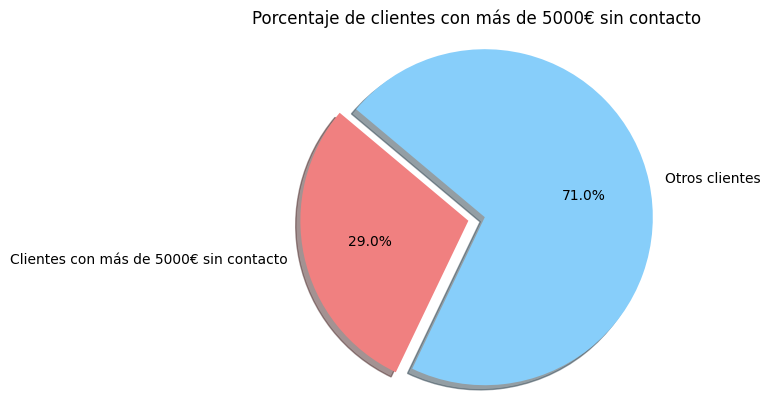

In [125]:
labels = [f"Clientes con más de {saldo}€ sin contacto", "Otros clientes"]
sizes = [df_sin_contacto_prct, 100 - df_sin_contacto_prct]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

# Crear el gráfico de barras
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f"Porcentaje de clientes con más de {saldo}€ sin contacto")
plt.show()

#### Personas con más dinero

In [90]:
personas_con_mas_de = (df[df['saldo']>25000])
print(f"Hay un total de {personas_con_mas_de.shape[0]} personas con mas de 25.000€")

Hay un total de 97 personas con mas de 25.000€


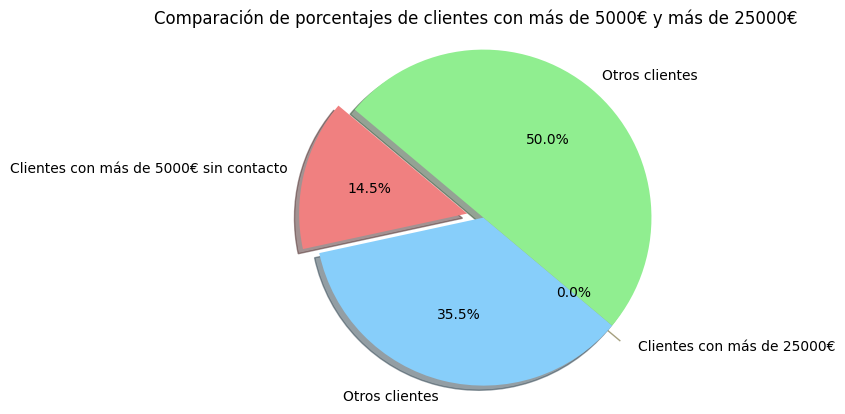

In [128]:
#GRAFICO
personas_con_mas_de = df[df['saldo'] > 25000]
porcentaje_personas_con_mas_de = (personas_con_mas_de.shape[0] / df.shape[0]) * 100
porcentaje_personas_con_mas_de = int(porcentaje_personas_con_mas_de)

# Crear gráfico combinado
labels_combined = [f"Clientes con más de {saldo}€ sin contacto", "Otros clientes",
                   f"Clientes con más de {25000}€", "Otros clientes"]
sizes_combined = [df_sin_contacto_prct, 100 - df_sin_contacto_prct,
                  porcentaje_personas_con_mas_de, 100 - porcentaje_personas_con_mas_de]
colors_combined = ['lightcoral', 'lightskyblue', 'gold', 'lightgreen']
explode_combined = (0.1, 0, 0.1, 0)

# Crear el gráfico de barras combinado
plt.pie(sizes_combined, explode=explode_combined, labels=labels_combined, colors=colors_combined, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f"Comparación de porcentajes de clientes con más de {saldo}€ y más de 25000€")
plt.show()

In [92]:
print(personas_con_mas_de['deuda'].value_counts())
print(f"Vemos que el 100% de las personas con 25.000€ no tienen deuda")

deuda
no    97
Name: count, dtype: int64
Vemos que el 100% de las personas con 25.000€ no tienen deuda


#### Personas con vivienda en propiedad

In [93]:
df_vivienda_si =df[df['vivienda'] == 'si']
num_persona_con_vivienda =df[df['vivienda'] == 'si'].shape[0]
num_persona_con_vivienda = int(num_persona_con_vivienda)
num_persona_con_vivienda_prct = int(((num_persona_con_vivienda) / df.shape[0])*100)

In [94]:
print(f"En la base de datos, hay un total de {num_persona_con_vivienda_prct}% de clientes con vivienda")
total_personas=df['vivienda'].value_counts().sum()

En la base de datos, hay un total de 55% de clientes con vivienda


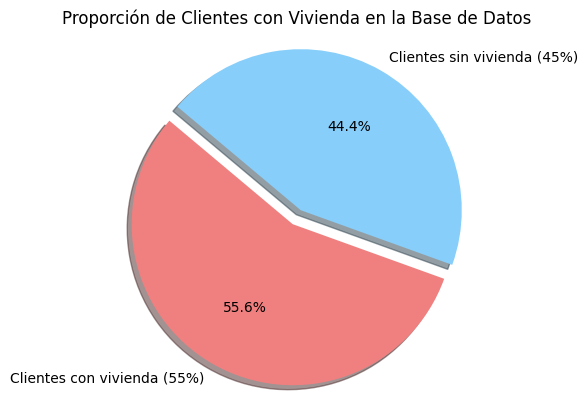

In [132]:
#GRAFICO
# Crear gráfico de pastel
labels = [f"Clientes con vivienda ({num_persona_con_vivienda_prct}%)", f"Clientes sin vivienda ({100 - num_persona_con_vivienda_prct}%)"]
sizes = [num_persona_con_vivienda, total_personas - num_persona_con_vivienda]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proporción de Clientes con Vivienda en la Base de Datos')
plt.show()

In [96]:
df_vivienda_propia_con_deuda = df_vivienda_si[df_vivienda_si['deuda'] == 'si']
#df_vivienda_propia_con_deuda[df_vivienda_propia_con_deuda['edad']==71]

In [97]:
df_vivienda_si_sin_deuda=df_vivienda_si[df_vivienda_si[['deuda','prestamo']] == 'no']

In [98]:
personas_sin_deuda_y_con_vivienda_sin_prestamo = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si') & (df['prestamo'] == 'no')]

# Contar el número de personas que cumplen con las condiciones
num_personas = len(personas_sin_deuda_y_con_vivienda_sin_prestamo)

# Mostrar la cantidad de personas en un DataFrame
dataframe_personas = personas_sin_deuda_y_con_vivienda_sin_prestamo.reset_index(drop=True)  # Reiniciar el índice
print("Cantidad de personas: ", num_personas)
print("\nDataFrame con las personas:")
dataframe_personas

Cantidad de personas:  20033

DataFrame con las personas:


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
2,9,30,blue-collar,soltero,secundaria/superiores,no,3,si,no,movil,51,25-jul-2021,1,-1,0,NaN,no
3,12,48,blue-collar,divorciado,secundaria/superiores,no,65,si,no,movil,146,14-may-2021,1,370,1,sin_exito,no
4,14,31,management,divorciado,universitarios,no,883,si,no,movil,112,5-mar-2021,2,106,1,sin_exito,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20028,44247,29,services,soltero,secundaria/superiores,no,498,si,no,NaN,177,3-jun-2021,26,-1,0,NaN,no
20029,44249,30,blue-collar,casado,priamaria,no,597,si,no,NaN,190,23-may-2021,1,-1,0,NaN,no
20030,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,9-jun-2021,1,-1,0,NaN,no
20031,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,NaN,no


#### Personas sin deuda con vivienda en propiedad sin presatamo y sin contacto

In [134]:
personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono=personas_sin_deuda_y_con_vivienda_sin_prestamo['tipo_contacto'].isnull().sum()
personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono_prct=int((personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono / personas_sin_deuda_y_con_vivienda_sin_prestamo.shape[0])* 100)
print(f"En la base de datos, hay un total de {personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono_prct}% de personas sin contacto y con vivienda en propiedad sin prestamo y sin telefono")

En la base de datos, hay un total de 37% de personas sin contacto y con vivienda en propiedad sin prestamo y sin telefono


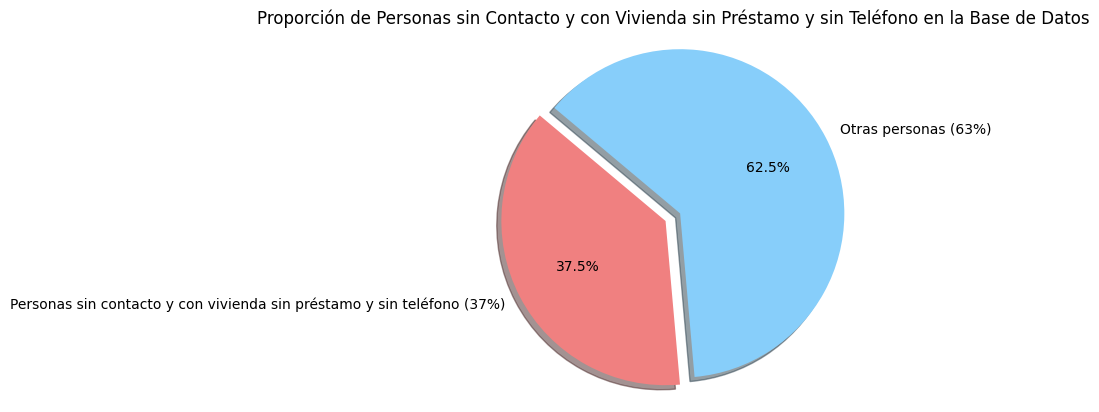

In [135]:
#GRAFICO
# Crear gráfico de pastel
labels = [f"Personas sin contacto y con vivienda sin préstamo y sin teléfono ({personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono_prct}%)",
          f"Otras personas ({100 - personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono_prct}%)"]
sizes = [personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono, personas_sin_deuda_y_con_vivienda_sin_prestamo.shape[0] - personas_sin_deuda_y_con_vivienda_sin_prestamo_sin_telefono]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proporción de Personas sin Contacto y con Vivienda sin Préstamo y sin Teléfono en la Base de Datos')
plt.show()

#### Personas con estado civil 'casados' 

In [142]:
#Se miran las personas que están casadas ya que al ser dos personas en la unidad familiar es más facil destinar x dinero al mes
df_personas_casadas = df[df['estado_civil'] == 'casado']
#Se puede obsevar  que contra mas saldo hay, la probabilidad de que tenga vivienda es más alta
# Tambien se puede apreciar que la media de edad sube
total_personas_casadas = df_personas_casadas.shape[0]


In [143]:
#Personas con estado civil 'casados' con más saldo
saldo = 5000
df_personas_casadas_con_mas_saldo=df_personas_casadas[df_personas_casadas['saldo'] > saldo]
print(f"Hay un total de {df_personas_casadas_con_mas_saldo.shape[0]} personas casadas con mas de {saldo}€.")
porcentaje_personas_casadas_con_mas_saldo = (df_personas_casadas_con_mas_saldo.shape[0] / total_personas_casadas) * 100

Hay un total de 1766 personas casadas con mas de 5000€.


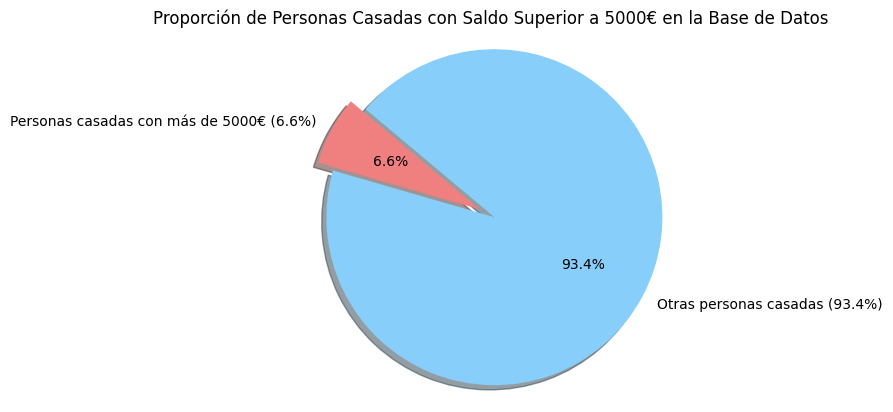

In [140]:
#GRAFICO
# Crear gráfico de pastel
labels = [f"Personas casadas con más de {saldo}€ ({porcentaje_personas_casadas_con_mas_saldo:.1f}%)",
          f"Otras personas casadas ({100 - porcentaje_personas_casadas_con_mas_saldo:.1f}%)"]
sizes = [df_personas_casadas_con_mas_saldo.shape[0], total_personas_casadas - df_personas_casadas_con_mas_saldo.shape[0]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(f'Proporción de Personas Casadas con Saldo Superior a {saldo}€ en la Base de Datos')
plt.show()

In [146]:
#Personas con estado civil 'casados' con más saldo con vivienda
df_personas_casadas_con_mas_saldo_con_vivienda=df_personas_casadas_con_mas_saldo[df_personas_casadas_con_mas_saldo['vivienda'] == 'si']
print(f"Hay un total de {df_personas_casadas_con_mas_saldo_con_vivienda.shape[0]} personas casadas con más de {saldo}€ y que tienen vivienda propia" )
porcentaje_personas_casadas_con_mas_saldo_con_vivienda = (df_personas_casadas_con_mas_saldo_con_vivienda.shape[0] / total_personas_casadas) * 100


Hay un total de 808 personas casadas con más de 5000€ y que tienen vivienda propia


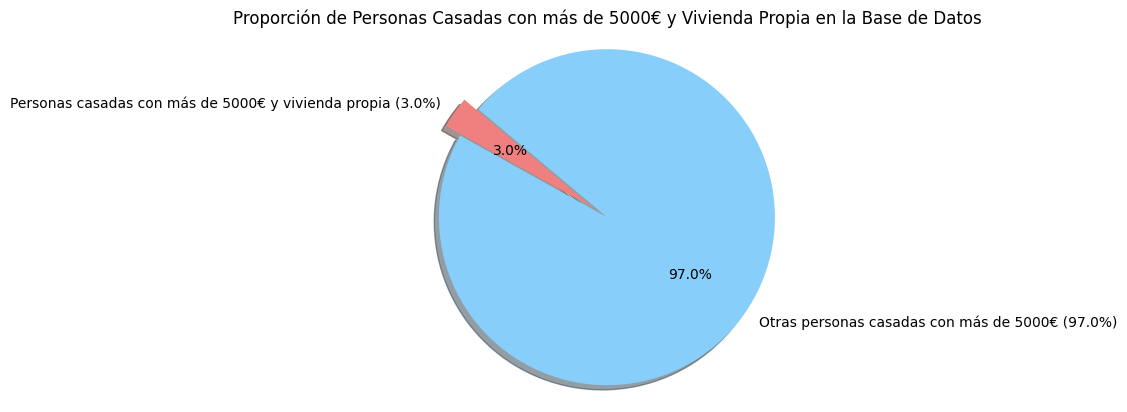

In [148]:
#GRAFICO
# Crear gráfico de pastel
labels = [f"Personas casadas con más de {saldo}€ y vivienda propia ({porcentaje_personas_casadas_con_mas_saldo_con_vivienda:.1f}%)",
          f"Otras personas casadas con más de {saldo}€ ({100 - porcentaje_personas_casadas_con_mas_saldo_con_vivienda:.1f}%)"]
sizes = [df_personas_casadas_con_mas_saldo_con_vivienda.shape[0], total_personas_casadas - df_personas_casadas_con_mas_saldo_con_vivienda.shape[0]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(f'Proporción de Personas Casadas con más de {saldo}€ y Vivienda Propia en la Base de Datos')
plt.show()

In [124]:
df_personas_casadas_con_mas_saldo_con_vivienda_con_contacto = df_personas_casadas_con_mas_saldo_con_vivienda[df_personas_casadas_con_mas_saldo_con_vivienda['tipo_contacto'] == 'movil' ]
print(f"Hay un total de {df_personas_casadas_con_mas_saldo_con_vivienda_con_contacto.shape[0]} personas casadas con más de {saldo}€ y que tienen vivienda propia y tenemos el contacto" )

Hay un total de 510 personas casadas con más de 5000€ y que tienen vivienda propia y tenemos el contacto


In [150]:
#GRAFICO


#### PRUEBAS